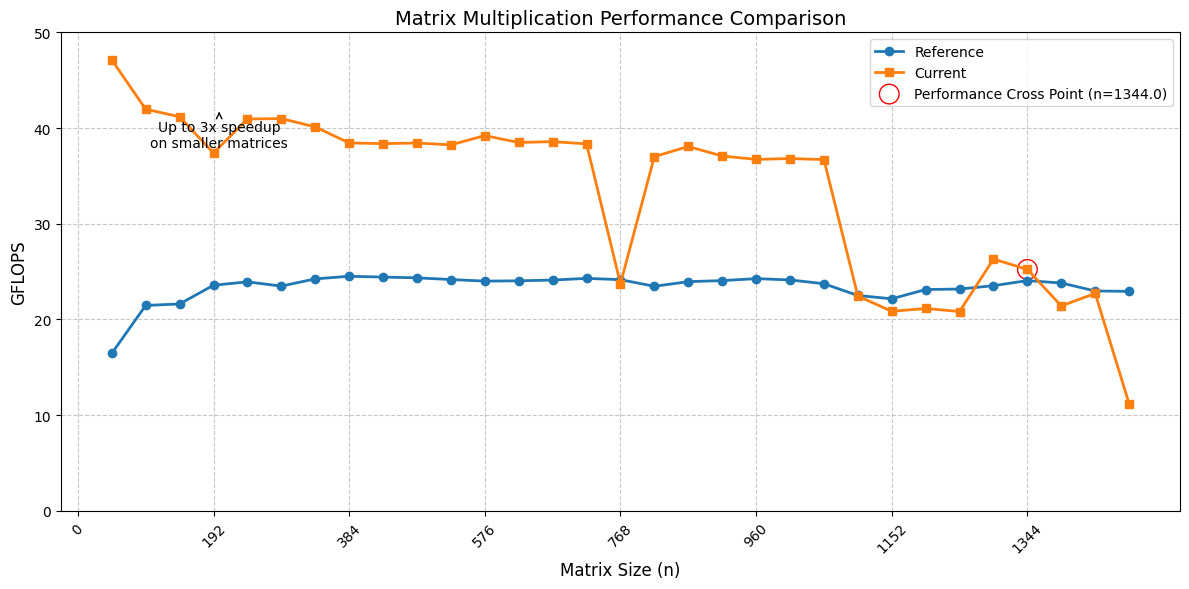

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 提取数据 (n, reference GFLOPS, current GFLOPS)
data = [
    [1488, 2.2935e+01, 1.1187e+01],
    [1440, 2.2978e+01, 2.2723e+01],
    [1392, 2.3810e+01, 2.1413e+01],
    [1344, 2.4060e+01, 2.5226e+01],
    [1296, 2.3530e+01, 2.6313e+01],
    [1248, 2.3178e+01, 2.0831e+01],
    [1200, 2.3129e+01, 2.1148e+01],
    [1152, 2.2159e+01, 2.0853e+01],
    [1104, 2.2506e+01, 2.2448e+01],
    [1056, 2.3735e+01, 3.6703e+01],
    [1008, 2.4130e+01, 3.6815e+01],
    [960, 2.4268e+01, 3.6726e+01],
    [912, 2.4061e+01, 3.7076e+01],
    [864, 2.3952e+01, 3.8072e+01],
    [816, 2.3465e+01, 3.7014e+01],
    [768, 2.4160e+01, 2.3727e+01],
    [720, 2.4295e+01, 3.8348e+01],
    [672, 2.4118e+01, 3.8581e+01],
    [624, 2.4038e+01, 3.8490e+01],
    [576, 2.4007e+01, 3.9213e+01],
    [528, 2.4173e+01, 3.8242e+01],
    [480, 2.4349e+01, 3.8436e+01],
    [432, 2.4429e+01, 3.8371e+01],
    [384, 2.4513e+01, 3.8443e+01],
    [336, 2.4243e+01, 4.0117e+01],
    [288, 2.3485e+01, 4.0989e+01],
    [240, 2.3931e+01, 4.0943e+01],
    [192, 2.3577e+01, 3.7388e+01],
    [144, 2.1620e+01, 4.1179e+01],
    [96, 2.1465e+01, 4.1970e+01],
    [48, 1.6458e+01, 4.7121e+01],
]

data = np.array(data)
n = data[:, 0]
ref_gflops = data[:, 1]
cur_gflops = data[:, 2]

# 创建图表
plt.figure(figsize=(12, 6), dpi=100)

# 绘制GFLOPS对比线
plt.plot(n, ref_gflops, 'o-', label='Reference', linewidth=2, markersize=6)
plt.plot(n, cur_gflops, 's-', label='Current', linewidth=2, markersize=6)

# 标记性能反转点
cross_idx = np.where(cur_gflops > ref_gflops)[0][0]
plt.scatter(n[cross_idx], cur_gflops[cross_idx], s=200, 
            facecolors='none', edgecolors='red', 
            label=f'Performance Cross Point (n={n[cross_idx]})')

# 添加标注和美化
plt.title('Matrix Multiplication Performance Comparison', fontsize=14)
plt.xlabel('Matrix Size (n)', fontsize=12)
plt.ylabel('GFLOPS', fontsize=12)
plt.xticks(np.arange(0, 1501, 192), rotation=45)
plt.yticks(np.arange(0, 51, 10))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# 添加性能提升标注
plt.annotate('Up to 3x speedup\non smaller matrices', 
             xy=(200, 42), xytext=(200, 38),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, ha='center')

plt.savefig('gflops_comparison.png', bbox_inches='tight')
plt.show()

In [3]:
import numpy as np
import time

# 设置随机种子以保证结果可复现
np.random.seed(42)

# 生成两个1488×1488的随机方阵
matrix_a = np.random.rand(1968, 1968)
matrix_b = np.random.rand(1968, 1968)

# 预热：先进行一次计算避免冷启动影响
# _ = np.dot(matrix_a, matrix_b)

# 正式计算并计时
start_time = time.perf_counter()  # 高精度计时开始
result = np.dot(matrix_a, matrix_b)
end_time = time.perf_counter()    # 计时结束

# 计算耗时（毫秒）
duration_ms = (end_time - start_time) * 1000
duration_ms

47.7564680040814